In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

**Note**: Since the original path points to a local directory on your machine, I'll assume the dataset is publicly available and add code to download it. **You'll need to replace the placeholder URL with the actual URL of your dataset.**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
# Example: https://www.kaggle.com/datasets/akshat108/e-waste-image-dataset
!kaggle datasets download -d akshat103/e-waste-image-dataset

Dataset URL: https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset
License(s): apache-2.0
  0% 0.00/11.8M [00:00<?, ?B/s]
100% 11.8M/11.8M [00:00<00:00, 1.07GB/s]


In [3]:
!unzip e-waste-image-dataset.zip

Archive:  e-waste-image-dataset.zip
  inflating: modified-dataset/test/Battery/battery_106.jpg  
  inflating: modified-dataset/test/Battery/battery_128.jpg  
  inflating: modified-dataset/test/Battery/battery_148.jpg  
  inflating: modified-dataset/test/Battery/battery_152.jpg  
  inflating: modified-dataset/test/Battery/battery_174.jpg  
  inflating: modified-dataset/test/Battery/battery_177.jpg  
  inflating: modified-dataset/test/Battery/battery_190.jpg  
  inflating: modified-dataset/test/Battery/battery_192.jpg  
  inflating: modified-dataset/test/Battery/battery_211.jpg  
  inflating: modified-dataset/test/Battery/battery_22.jpg  
  inflating: modified-dataset/test/Battery/battery_24.jpg  
  inflating: modified-dataset/test/Battery/battery_241.jpg  
  inflating: modified-dataset/test/Battery/battery_242.jpg  
  inflating: modified-dataset/test/Battery/battery_251.jpg  
  inflating: modified-dataset/test/Battery/battery_259.jpg  
  inflating: modified-dataset/test/Battery/battery_

In [10]:
testpath="/content/modified-dataset/test"
trainpath="/content/modified-dataset/train"
validpath="/content/modified-dataset/val"

In [6]:
datatrain=tf.keras.preprocessing.image_dataset_from_directory(trainpath,
                                                              batch_size=32,
                                                              shuffle=True,
                                                              image_size=(150,150))

Found 2400 files belonging to 10 classes.


In [7]:
datatest=tf.keras.preprocessing.image_dataset_from_directory(testpath,
                                                              batch_size=32,
                                                             shuffle=True,
                                                              image_size=(150,150))

Found 300 files belonging to 10 classes.


In [11]:
datavalid=tf.keras.preprocessing.image_dataset_from_directory(validpath,
                                                              batch_size=32,
                                                              shuffle=True,
                                                              image_size=(150,150))

Found 300 files belonging to 10 classes.


In [14]:
class_names = datatrain.class_names
print(class_names)
print(len(class_names))

['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']
10


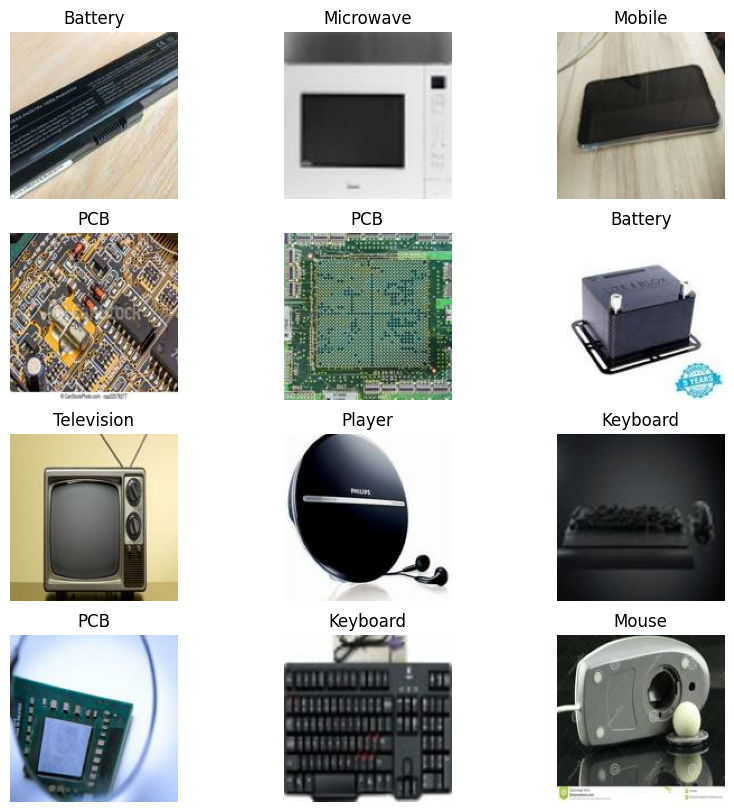

In [15]:
# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")